In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import math
from sklearn import linear_model
from matplotlib import pyplot as plt
%matplotlib inline

In [8]:
# read in Dataset
df = pd.read_csv('../data-101/offenses_new_york_city_2013.csv')
df.columns = ['City', 'Population', 'Violent_crime', 'Murder', 'Rape', 'Rape2', 'Robbery', 'Agg_assault', 
              'Property_crime', 'Burglary', 'Larceny_theft', 'MV_theft', 'Arson3']

In [9]:
print(df[df.Population > 300000])

         City  Population  Violent_crime  Murder  Rape  Rape2  Robbery  \
216  New York     8396126          52384     335   NaN   1112    19170   

     Agg_assault  Property_crime  Burglary  Larceny_theft  MV_theft  Arson3  
216        31767          141971     16606         117931      7434     NaN  


In [34]:
# clean Dataset
df_clean = pd.DataFrame()
df_clean = df.drop(['Rape', 'Arson3'], axis=1)
df_clean = df_clean.drop([216], axis=0)

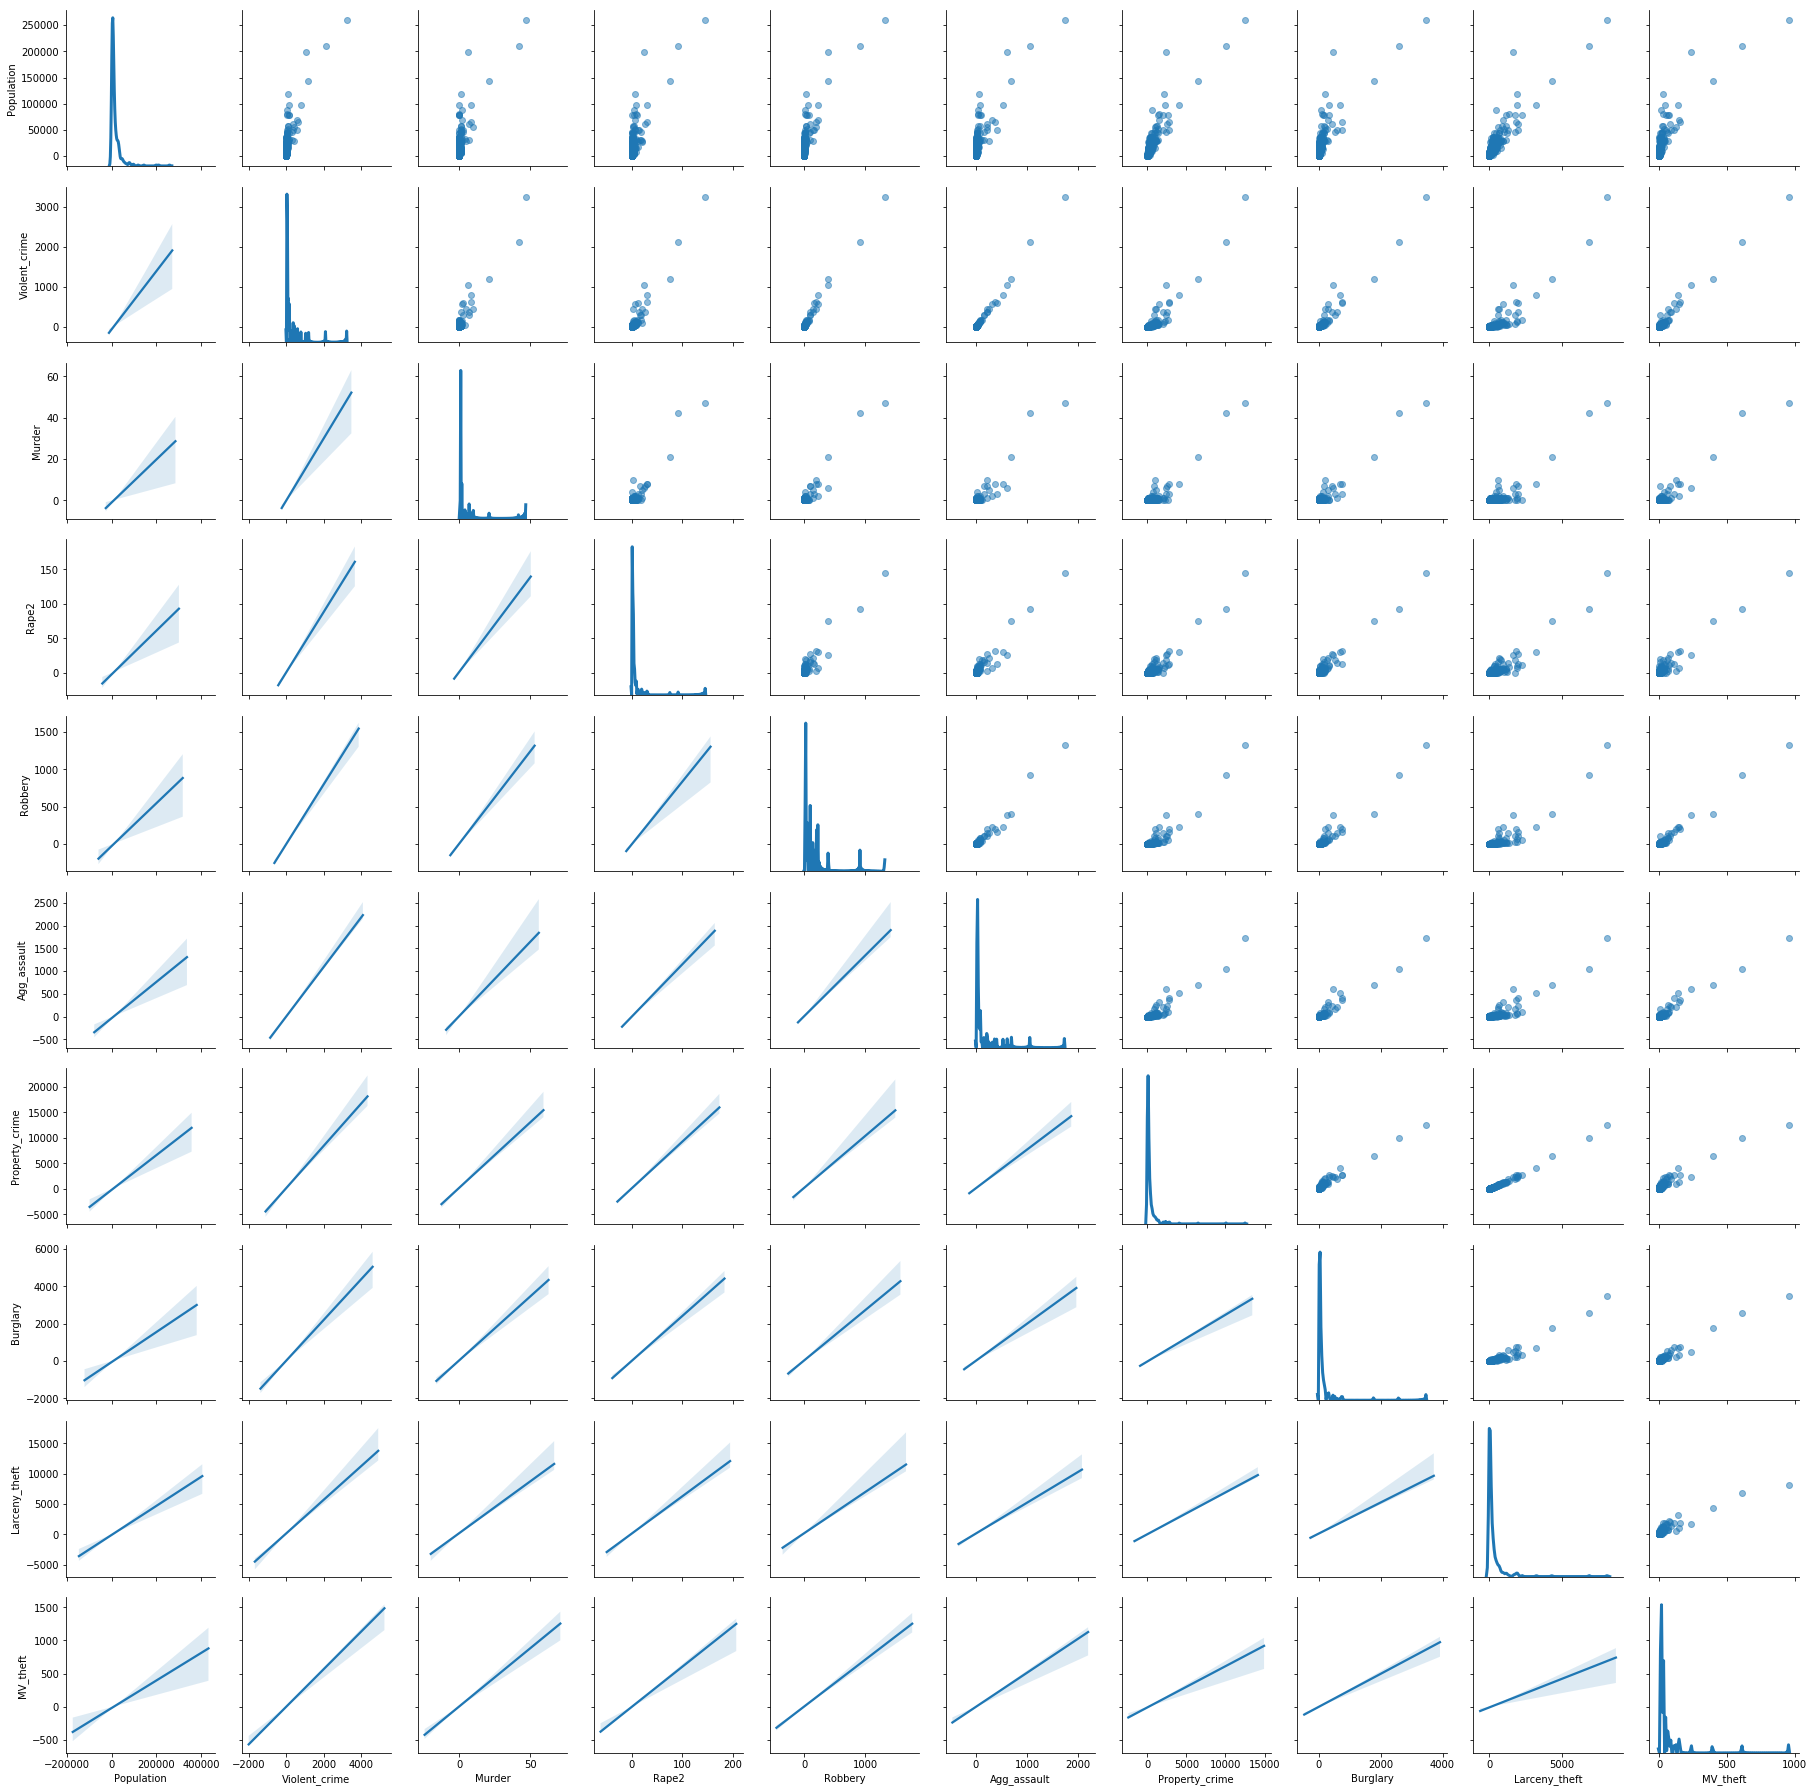

In [36]:
# scan data with univariate & bivariate methods
graph = sns.PairGrid(df_clean, diag_sharey=False)
graph.map_upper(plt.scatter, alpha=0.5)
graph.map_lower(sns.regplot, scatter_kws=dict(alpha=0))
graph.map_diag(sns.kdeplot, lw=3)
plt.show()

In [38]:
df_clean.head()

,City,Population,Violent_crime,Murder,Rape2,Robbery,Agg_assault,Property_crime,Burglary,Larceny_theft,MV_theft
0,Adams Village,1861,0,0,0,0,0,12,2,10,0
1,Addison Town and Village,2577,3,0,0,0,3,24,3,20,1
2,Akron Village,2846,3,0,0,0,3,16,1,15,0
3,Albany,97956,791,8,30,227,526,4090,705,3243,142
4,Albion Village,6388,23,0,3,4,16,223,53,165,5


In [39]:
# construct data for fitting
x = pd.DataFrame()
y = pd.DataFrame()
x['Population'] = df_clean['Population']
x['Population2'] = [x*x for x in x['Population'].tolist()]
x['Violent_crime'] = df_clean['Violent_crime']
x['Murder'] = df_clean['Murder'].apply(lambda x: 1 if x > 0 else 0)
x['Rape2'] = df_clean['Rape2'].apply(lambda x: 1 if x > 0 else 0)
x['Robbery'] = df_clean['Robbery'].apply(lambda x: 1 if x > 0 else 0)
x['Agg_assault'] = df_clean['Agg_assault']
x['Burglary'] = df_clean['Burglary']
x['Larceny_theft'] = df_clean['Larceny_theft']
x['MV_theft'] = df_clean['MV_theft'].apply(lambda x: 1 if x > 0 else 0)

y['Property_crime'] = df_clean['Property_crime']

In [40]:
model = linear_model.LinearRegression()
model.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [41]:
print('The fitted coefficiency = {}'.format(model.coef_))
print('The fitted intercept = {}'.format(model.intercept_))
print(model.score(x, y))

The fitted coefficiency = [[ 1.00586286e-04  1.25263543e-09  3.71783515e-01 -4.72547865e+00
  -1.12362277e+00 -4.88039429e-01 -3.76692701e-01  1.09250214e+00
   9.93732146e-01  2.17471364e+00]]
The fitted intercept = [-0.95519098]
0.999947616343237


In [42]:
pred_y = model.predict(x)

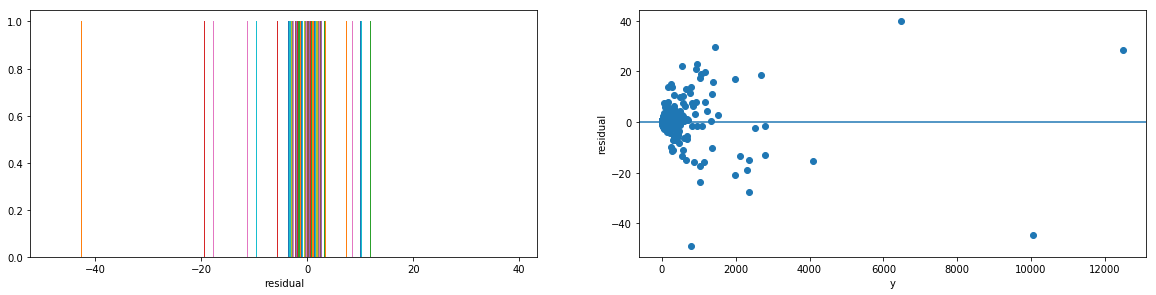

In [43]:
plt.figure(figsize=(20, 10))
plt.subplot(2,2,1)
plt.hist((y - pred_y))
plt.xlabel('residual')

plt.subplot(2,2,2)
plt.scatter(y, (y - pred_y))
plt.xlabel('y')
plt.ylabel('residual')
plt.axhline(y=0)
plt.show()

## from right plot, it looks a little concerning. The residual is consistently positive 
##       for y > 2000

##  multicollinearity
##           In this case, two features, Population & Population2 are strongly collerated.